# Google store data
## Intro
This anlysis used the dataset resources from Kaggle [Database of Android Apps](https://www.kaggle.com/orgesleka/android-apps) , [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps) and [Mobile App Store ( 7200 apps)](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps).

I also used the analysis method from [All that you need to know about the Android market](https://www.kaggle.com/lava18/all-that-you-need-to-know-about-the-android-market) and [How to get "High" Rating on Play Store](https://www.kaggle.com/tanetboss/how-to-get-high-rating-on-play-store).

I will use these three datasets to understand how rating is affacted in Google Play market (and iOS app store)

pd represents Dataset from [Database of Android Apps](https://www.kaggle.com/orgesleka/android-apps)

df represents Dataset from [Google Play Store Apps](https://www.kaggle.com/lava18/google-play-store-apps)

ad represents Dataset from [Mobile App Store ( 7200 apps)](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps)


In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
sns.set_context('talk')
sns.set_style('darkgrid')
sns.set_palette('colorblind')
sns.set(rc={'figure.figsize':(25,15)})
plt.style.use('ggplot')

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings('ignore')

In [6]:
gd = pd.read_csv('https://tufts.box.com/shared/static/8utsdmfx97s0o1j63l1ogwr3822coo6l.csv')
df = pd.read_csv('https://tufts.box.com/shared/static/alsoyenvkbs5kuuyjkpjslk8x6iou6up.csv')
ad = pd.read_csv('https://tufts.box.com/shared/static/apy20t1jghwu4vxho9p3mar23vmgfw67.csv')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


I inputed two different datasets on Google Play app and one dataset on iOS app store

In [9]:
#print(gd.dtypes)
gd.drop_duplicates(subset='App', inplace=True)
gd = gd[gd['Android Ver'] !=np.nan]
gd = gd[gd['Android Ver'] !='NAN']
gd = gd[gd['Installs'] != 'Free']
gd = gd[gd['Installs'] != 'Paid']
df = df[df['fileSize'] != '']

In [10]:
print('Number of apps in the first dataset : ' , len(gd))
gd.sample(7)

Number of apps in the first dataset :  9659


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9270,My EF Center,FAMILY,2.8,89,35M,10000,Free,0,Everyone,Education,"July 23, 2018",1.10.0,4.4 and up
1708,Toon Blast,GAME,4.7,1351068,Varies with device,10000000,Free,0,Everyone,Puzzle,"July 30, 2018",3196,4.1 and up
7454,Project Grand Auto Town Sandbox Beta,GAME,3.7,7885,28M,500000,Free,0,Mature 17+,Racing,"February 9, 2018",1.07,4.0 and up
7773,Ultimate Calculator for CR,PRODUCTIVITY,3.7,7389,41M,500000,Free,0,Everyone,Productivity,"March 15, 2017",1.0.4,4.0 and up
10606,Fort Myers FL,PRODUCTIVITY,NaN,0,22M,100,Free,0,Everyone,Productivity,"September 17, 2015",2.4.0,4.1 and up
4866,"Abs, Core & Back Workout Challenge",HEALTH_AND_FITNESS,4.8,3908,33M,100000,Free,0,Everyone,Health & Fitness,"July 9, 2018",1.5.8,4.1 and up
3372,Smart Launcher 5,PERSONALIZATION,4.4,512102,Varies with device,10000000,Free,0,Everyone,Personalization,"July 16, 2018",Varies with device,Varies with device


In [11]:
print('Number of apps in the second dataset : ' , len(df))
df.sample(7)

Number of apps in the second dataset :  9264


,name,datePublished,numDownloadsMin,fileSize,packageName,price,aggregateRating,softwareVersion,ratingCount,dateCrawled,url
2845,Dropbox,1. Oktober 2014,100000000,NaN,com.dropbox.android,0.00,4.480693,NaN,863919,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
6884,Five Game,NaN,10,117k,it.andreamarangoni.fivegame,0.00,4.800000,1.1,5,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
8739,CSOMobile,7. Mai 2014,500,12M,air.com.cstoreoffice.mobile,0.00,4.200000,2.0.3,10,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
3028,Frisuren Testen: Friseursalon,29. Juli 2014,1000000,25M,com.kauf.imagefaker.hairstylesfunandfashion,0.00,3.551208,1.7.0,4014,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
7013,Audiolibro El Juego del Dinero,2. Januar 2014,100,9.7M,com.libromovil.dinero,4.49,2.000000,2.0.0,2,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
4194,Gehirn Sudoku Free,7. Januar 2013,1000,2.5M,com.ipandalab.sudoku.free,0.00,3.750000,1,4,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
5222,clixxie-fotobuch,24. September 2014,5000,7.7M,de.femory.clixxie,0.00,4.166667,1.17,48,10/5/14 0:00,https://play.google.com/store/apps/details?id=...


In [12]:
print('Number of apps in the third dataset : ' , len(ad))
ad.sample(7)

Number of apps in the third dataset :  7197


,Unnamed: 0,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
6563,9621,1135518490,Wild City Rush - Urban Jungle Adventure,179205120,USD,0.00,19,2,4.5,5.0,1.0.6,9+,Games,38,5,1,1
3407,4121,961662290,Lords & Castles - Medieval War Strategy MMO Games,251610112,USD,0.00,439,4,4.0,3.5,1.59,12+,Games,38,5,10,1
2420,2843,794730213,Slice Fractions,209878016,USD,3.99,834,140,4.5,5.0,1.04.00,4+,Education,38,5,15,1
6754,10007,1145602670,Masky,156213248,USD,0.00,69,25,4.5,4.0,1.2,4+,Games,40,5,1,1
4475,5676,1046480662,Pocket Glasses PRO - text magnifier app,8976384,USD,3.99,18,0,2.0,0.0,1.07,4+,Utilities,37,3,1,1
3898,4815,1004871562,Sky Viper Video Viewer,232875008,USD,0.00,105,13,3.0,2.0,2.4,4+,Entertainment,37,1,1,1
1306,1517,523403945,Best Skins Creator Pro - for Minecraft PE & PC,36002816,USD,1.99,4243,48,4.0,4.5,5.3.5,4+,Utilities,37,5,2,1


## Data Cleaning
###  First dataset(gd)
1. Convert all size to MB (KB devided by 10^3) and remove "M" and "K" to make it an number
2. Remove "+" of installs and make it int
3. Remove "$" of Price and make it float
4. Change Type "Paid" and "Free" to bool "True" and "False"
5. Change "Reviews" to int

In [19]:
gd['Installs'] = gd['Installs'].apply(lambda x: x.replace('+','') if '+' in str(x) else x)
gd['Installs'] = gd['Installs'].apply(lambda x: x.replace(',','') if ',' in str(x) else x)
# gd['Installs'] = gd['Installs'].str.replace('+','')
gd['Installs'] = gd['Installs'].apply(lambda x: int(x))
# gd['Installs'] = pd.to_numeric(gd['Installs']) should be faster

Using Excel "Filter" I found out apart from exact size, there is "Varies with device". We need to change it to NaN to change the whole column into number

In [20]:
gd['Size'] = gd['Size'].apply(lambda x: str(x).replace('Varies with device','NaN' ) if 'Varies with device' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: str(x).replace('M','' ) if 'M' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: str(x).replace(',','' ) if 'M' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
gd['Size'] = gd['Size'].apply(lambda x: float(x))
gd.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [21]:
gd['Price'] = gd['Price'].apply(lambda x: str(x).replace('$','') if '$' in str(x) else x)
gd['Price'] = gd['Price'].apply(lambda x: float(x))
gd.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [22]:
# gd['Type'] = gd['Type'].apply(lambda x: str(x).replace('Free','0') if 'Free' in str(x) else x)
# gd['Type'] = gd['Type'].apply(lambda x: str(x).replace('Paid','1') if 'Paid' in str(x) else x)
# gd['Type'] = gd['Type'].apply(lambda x: bool(x))
# gd.dtypes
# pd.get_dummies(gd['Type'])

In [23]:
# suggestion
# gd['Type'].unique()
# gd.join(pd.get_dummies(gd['Type']))

In [15]:
gd['Reviews'] = gd['Reviews'].apply(lambda x: int(x))

### Second dataset(df)

In [24]:
df.dtypes

name                object
datePublished       object
numDownloadsMin      int64
fileSize            object
packageName         object
price              float64
aggregateRating    float64
softwareVersion     object
ratingCount          int64
dateCrawled         object
url                 object
dtype: object

From the type above, I need to change the type of "fileSize" to float. In order to comply with the other dataset, I will convert the Gb, Kb to Mb, and get ride of M.

In [25]:
df['fileSize'] = df['fileSize'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
df['fileSize'] = df['fileSize'].apply(lambda x: float(str(x).replace('G', '')) * 1000 if 'k' in str(x) else x)
df['fileSize'] = df['fileSize'].apply(lambda x: str(x).replace('M','') if 'M' in str(x) else x)

### Third dataset(ad)

In [26]:
ad.dtypes

Unnamed: 0            int64
id                    int64
track_name           object
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

There is nothing need to be cleaned.

## Merging datasets

First, I will try to merge ad and pd using the app name. But becuase they don't have the same column name(one is "App" and another one is track_name), I need to change them to the same first)

In [28]:
ad.rename(columns={'track_name':'App'}, inplace=True)
ad.head()

,Unnamed: 0,id,App,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,1,281656475,PAC-MAN Premium,100788224,USD,3.99,21292,26,4.0,4.5,6.3.5,4+,Games,38,5,10,1
1,2,281796108,Evernote - stay organized,158578688,USD,0.00,161065,26,4.0,3.5,8.2.2,4+,Productivity,37,5,23,1
2,3,281940292,"WeatherBug - Local Weather, Radar, Maps, Alerts",100524032,USD,0.00,188583,2822,3.5,4.5,5.0.0,4+,Weather,37,5,3,1
3,4,282614216,"eBay: Best App to Buy, Sell, Save! Online Shop...",128512000,USD,0.00,262241,649,4.0,4.5,5.10.0,12+,Shopping,37,5,9,1
4,5,282935706,Bible,92774400,USD,0.00,985920,5320,4.5,5.0,7.5.1,4+,Reference,37,5,45,1


Now, the column of App name is the same now, we can start to merge them

In [20]:
md = pd.merge(gd, ad, on='App', how='inner')
print('Number of apps in the joint dataset : ' , len(md))

Number of apps in the joint dataset :  328


In [21]:
md.dtypes

App                  object
Category             object
Rating              float64
Reviews               int64
Size                float64
Installs              int64
Type                 object
Price               float64
Content Rating       object
Genres               object
Last Updated         object
Current Ver          object
Android Ver          object
Unnamed: 0            int64
id                    int64
size_bytes            int64
currency             object
price               float64
rating_count_tot      int64
rating_count_ver      int64
user_rating         float64
user_rating_ver     float64
ver                  object
cont_rating          object
prime_genre          object
sup_devices.num       int64
ipadSc_urls.num       int64
lang.num              int64
vpp_lic               int64
dtype: object

Looks like we got Lucky! There are 328 apps in both datasets. I will save it for further analysis

Second, I will try to merge gd and df using app name. Because of the same problem, we will change the name first.

In [22]:
df.rename(columns={'name':'App'}, inplace=True)

In [23]:
md2 = pd.merge(gd, df, on='App', how='inner')
print('Number of apps in the joint dataset : ' , len(md2))
md2.head()

Number of apps in the joint dataset :  173


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,...,datePublished,numDownloadsMin,fileSize,packageName,price,aggregateRating,softwareVersion,ratingCount,dateCrawled,url
0,Cool Reader,BOOKS_AND_REFERENCE,4.5,246315,NaN,10000000,Free,0.0,Everyone,Books & Reference,...,12. September 2014,10000000,6.6,org.coolreader,0.0,4.577154,NaN,147213,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
1,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,NaN,1000000000,Free,0.0,Teen,Books & Reference,...,2. Juni 2014,500000000,NaN,com.google.android.apps.books,0.0,3.824167,NaN,619379,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
2,Moon+ Reader,BOOKS_AND_REFERENCE,4.4,233757,NaN,10000000,Free,0.0,Everyone,Books & Reference,...,11. September 2014,10000000,7.4,com.flyersoft.moonreader,0.0,4.461517,2.6.5,160785,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
3,DC Comics,COMICS,4.2,25671,NaN,1000000,Free,0.0,Teen,Comics,...,24. September 2014,1000000,9.2,com.dccomics.comics,0.0,4.150023,3.6.3.3630,10585,10/5/14 0:00,https://play.google.com/store/apps/details?id=...
4,WhatsApp Messenger,COMMUNICATION,4.4,69119316,NaN,1000000000,Free,0.0,Everyone,Communication,...,30. September 2014,500000000,NaN,com.whatsapp,0.0,4.442019,NaN,18664636,10/5/14 0:00,https://play.google.com/store/apps/details?id=...


## Basic EDA

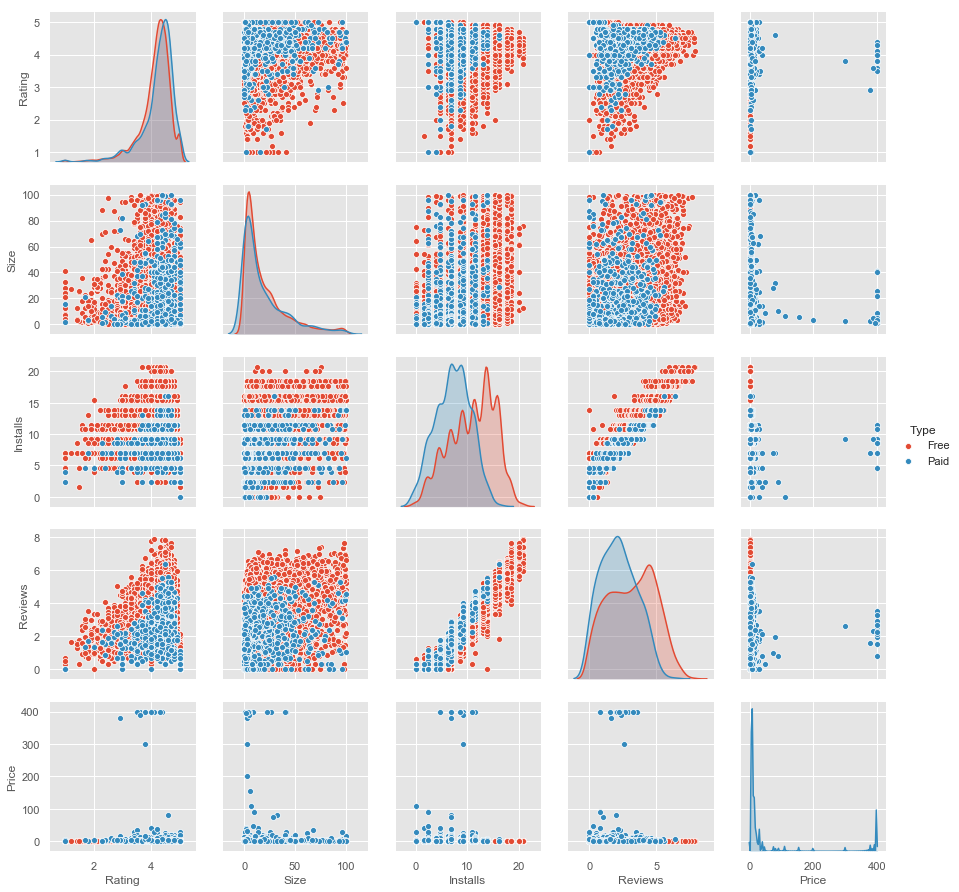

In [43]:
# df_plot = gd[['Rating', 'Size', 'Installs', 'Reviews', 'Type', 'Price']]
# df_plot['Installs'] = np.log(df_plot['Installs'])
# df_plot['Reviews'] = pd.to_numeric(df_plot['Reviews'])
# df_plot['Reviews'] = df_plot['Reviews'].loc[df_plot['Reviews'] != 0].dropna()
# df_plot['Reviews'] = np.log10(df_plot['Reviews'])
# df_plot.head()
# sns.pairplot(data=df_plot, hue='Type')

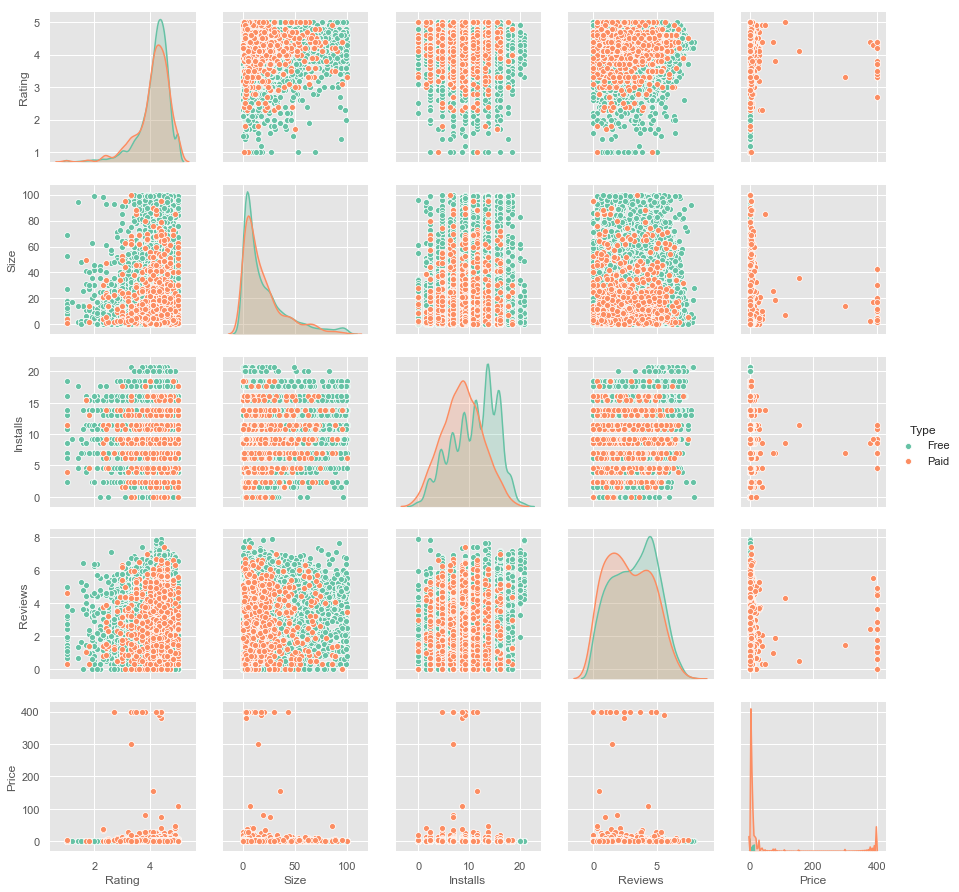

In [24]:
x = gd['Rating'].dropna()
y = gd['Size'].dropna()
z = gd['Installs'][gd.Installs!=0].dropna()
p = gd['Reviews'][gd.Reviews!=0].dropna()
t = gd['Type'].dropna()
price = gd['Price']

p = sns.pairplot(pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p), t, price)),
                              columns=['Rating','Size', 'Installs', 'Reviews', 'Type', 'Price']),
                                 hue='Type', palette="Set2")

This is the basic exploratory analysis to look for any evident patterns or relationships between the features. 

## More analysis
Then, I want to know the ratio of different categories. 

([<matplotlib.patches.Wedge at 0x11f1dedd8>,
 [Text(1.0998365672504447, 0.018961153413183076, 'BEAUTY'),
  Text(1.0984733916220633, 0.057932787765835984, 'COMICS'),
  Text(1.0955064272412511, 0.09932606844685547, 'PARENTING'),
  Text(1.0906107391607496, 0.14341623209122387, 'EVENTS'),
  Text(1.08369675236085, 0.18868319724487043, 'ART_AND_DESIGN'),
  Text(1.0741392004550119, 0.23711806773392047, 'HOUSE_AND_HOME'),
  Text(1.0610145760317489, 0.2902551798817182, 'WEATHER'),
  Text(1.0441429385328258, 0.34607155894704184, 'LIBRARIES_AND_DEMO'),
  Text(1.0235529050604362, 0.4029137011102277, 'AUTO_AND_VEHICLES'),
  Text(0.9971694457764505, 0.46438464273690916, 'ENTERTAINMENT'),
  Text(0.9624582166696858, 0.5326107219771382, 'FOOD_AND_DRINK'),
  Text(0.9197640776441195, 0.6033523360984544, 'EDUCATION'),
  Text(0.8677190453831755, 0.6760648328964545, 'MAPS_AND_NAVIGATION'),
  Text(0.7992056418596969, 0.7558242798558604, 'VIDEO_PLAYERS'),
  Text(0.7125479505971731, 0.8380187456732509, 'DATING

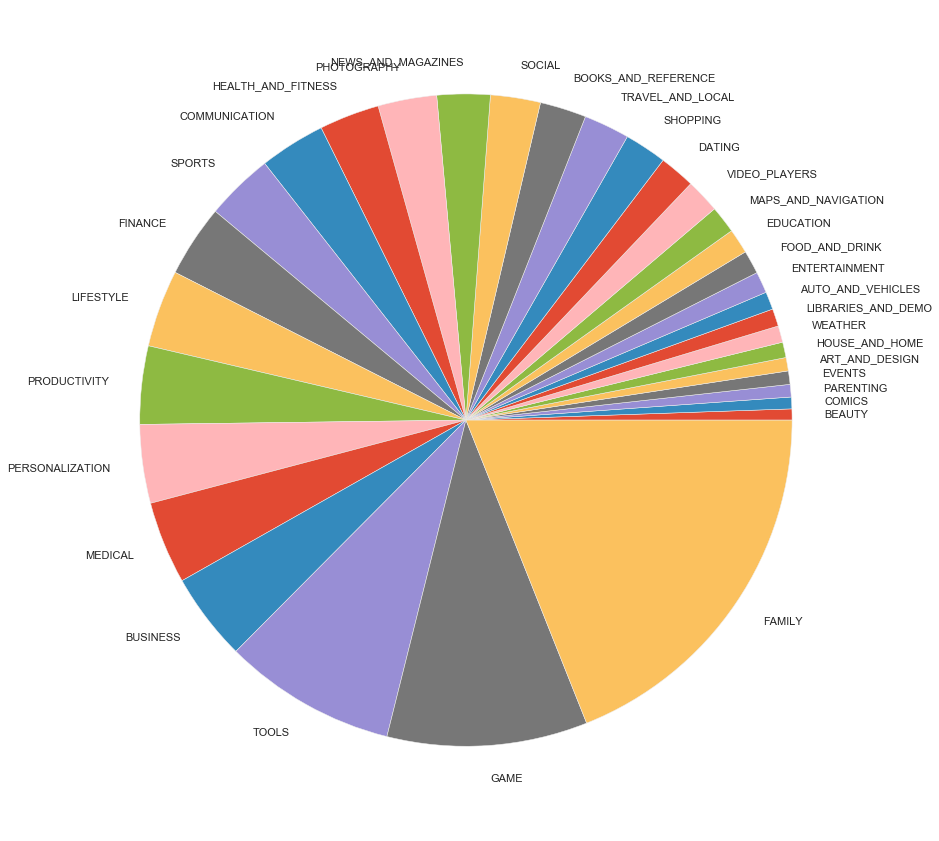

In [25]:
number_of_apps_in_category = gd['Category'].value_counts().sort_values(ascending=True)

plt.pie(x = number_of_apps_in_category.values,
        labels = number_of_apps_in_category.index,
        )


From the pie chart above, I know Family is the biggest category followed by Game and Tools. 
Then, I want to know what the general rating situation is

In [26]:
gd['Rating'].describe()

count    8196.000000
mean        4.173243
std         0.536625
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: Rating, dtype: float64

Text(0.5, 1.0, 'Distribution of Rating')

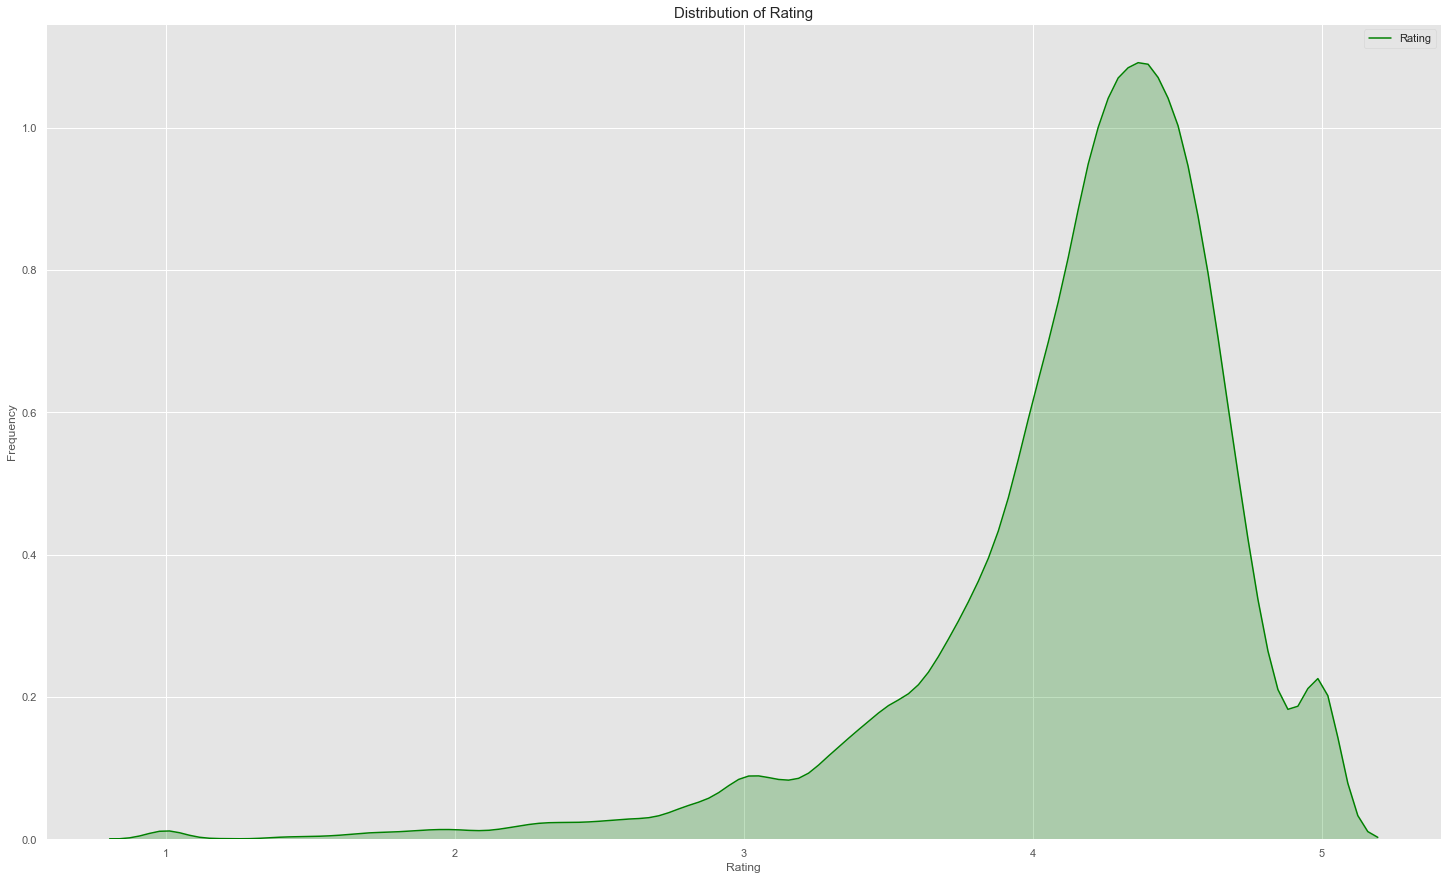

In [27]:
g = sns.kdeplot(gd.Rating, color="Green", shade = True)
g.set_xlabel("Rating")
g.set_ylabel("Frequency")
plt.title('Distribution of Rating',size = 15)

Distribute them into different categories

Text(0.5, 1.0, 'Boxplot of Rating VS Category')

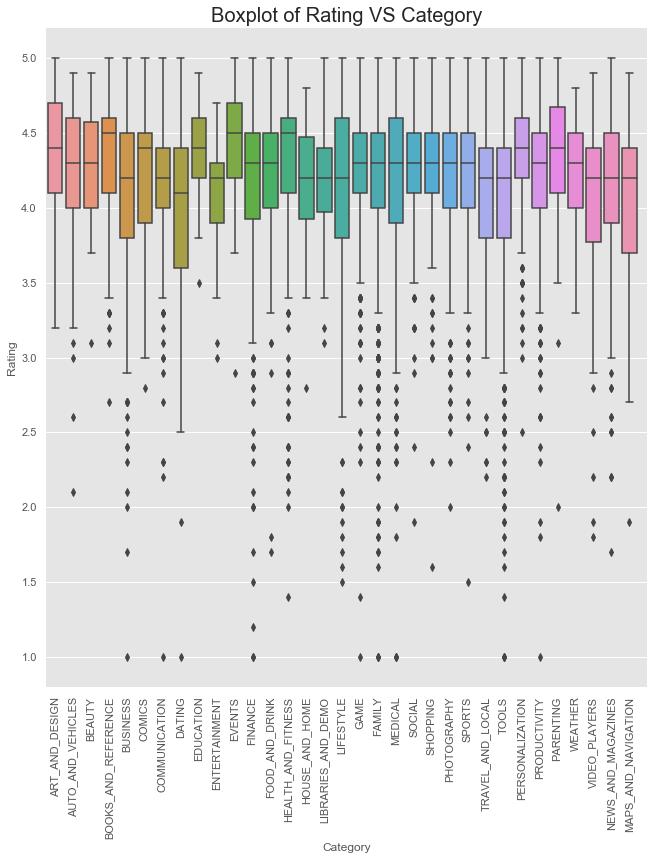

In [28]:
g = sns.catplot(x="Category",y="Rating",data=gd, kind="box", height = 10)
g.despine(left=True)
g.set_xticklabels(rotation=90)
g.set( xticks=range(0,34))
g = g.set_ylabels("Rating")
plt.title('Boxplot of Rating VS Category',size = 20)

Then, I want to know the correlation between size and the rating

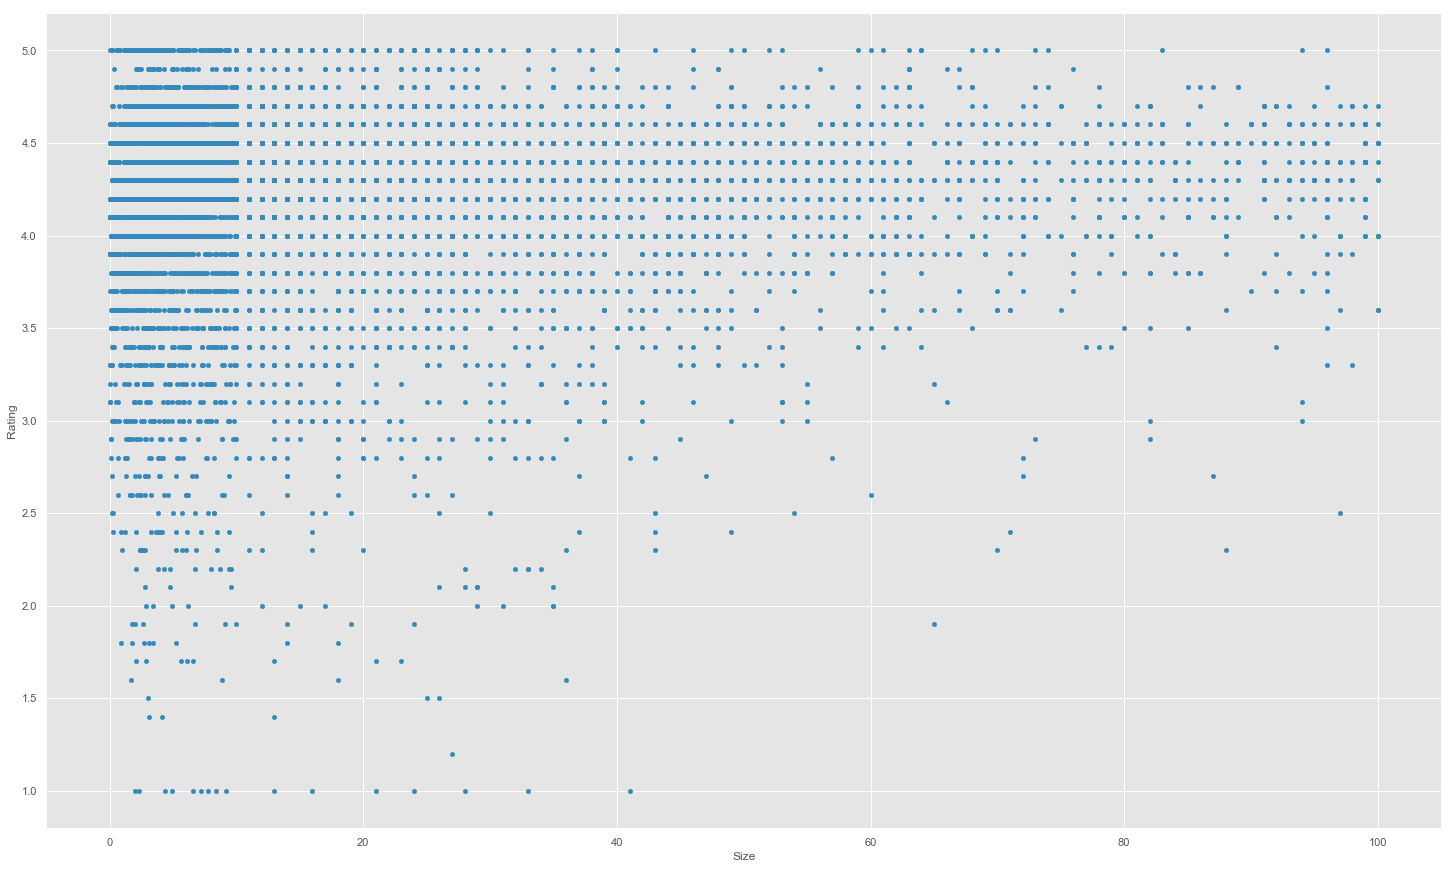

In [29]:
gd.plot.scatter('Size', 'Rating')

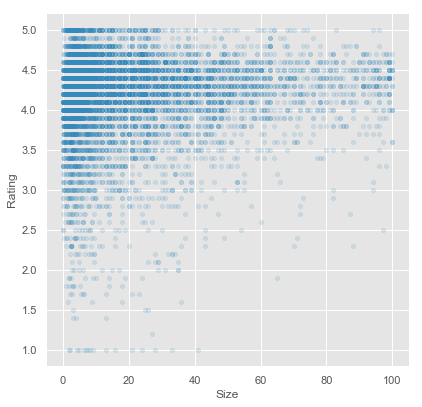

In [30]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
gd.plot.scatter('Size', 'Rating', alpha=0.15,ax=ax)

In [ ]:
sns.jointplot(data=gd, x='Rating', y='Size')